In [11]:
from generator import Pattern_generator, pattern_mixer

In [2]:
import timesynth as ts
import numpy as np
import math
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import random

In [3]:
%matplotlib inline

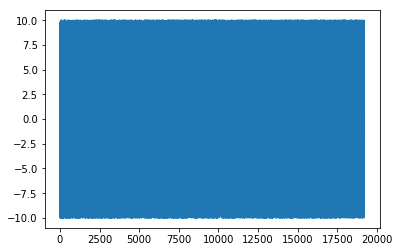

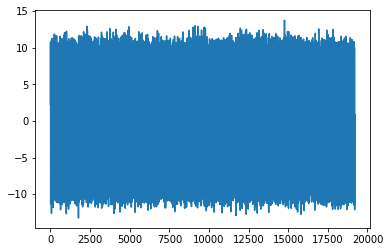

In [4]:
PG1 = Pattern_generator(series_length=192*100, period=24, amplitude=10, std=1, ftype = np.sin, signal_type = ts.signals.Sinusoidal)
PG1.plot()
PG1.plot(False)
# ptl = [(2000,4000),(5000,6000)]
# ml = [3,-2]
# PG1.bump(position_tuple_list = ptl, magnitude_list = ml, bump_the_smoother_line = True)
# PG1.plot()
# PG1.plot(False)
# PG1.bump(position_tuple_list = ptl, magnitude_list = ml, bump_the_smoother_line = False)
# PG1.plot()
# PG1.plot(False)

[1 2 2]
1
2
2


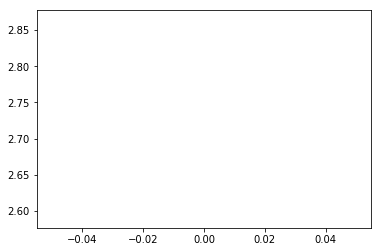

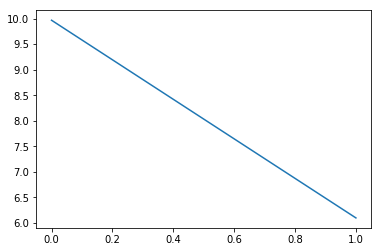

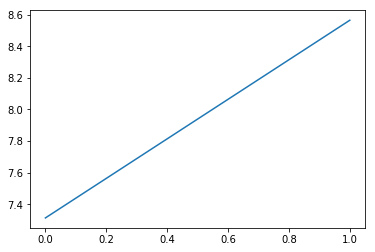

In [12]:
# GENERAL ASSUMPTION
window_size = 192
period_length = 24
N = 300
n_periods_per_window = window_size // period_length
time_series_length = window_size * N
amp = 10
std = 0.1
# DATASET NO. 1
# Potential Usage: (TBA) testing and prediction? 对照组？
# 随机选择1%的数据长度，放入起伏，对于放入位置没有过多要求 （不overlap即可），需有长短不一（短，中，长）的起伏持续长度。
# 起伏的振幅与正常周期函数相同，即，起伏处(此时可以理解为异常)为正常峰值的两倍左右。

    # ===> 选择2%的数据点对应的时间节点 [0,time_series_length]，生成列表，计算各两点之间的差值，放入差值列表
        # random.sample(population, k)
        # Return a k length list of unique elements chosen from the population sequence or set. Used for random sampling without replacement.

    # 满足长、中、短（优先级递减）起伏长度要求的点分别放入三个列表
    # 在每个列表内分别随机选取对应数量的起始位置
    # 若列表长度不足 从满足条件的其他列表内获得， 即 按与优先级相反的顺序分配 
    #          based on pre-coding assumption: 大部分选择均会满足最高优先级的要求）

population = list(range(time_series_length))
sample_size = int(time_series_length * 0.05)
if (sample_size % 2 != 0):
    sample_size += 1
list_chosen_x = random.sample(population=population, k = sample_size)
list_chosen_x.sort()
starting_points_list = list_chosen_x[0::2]
ending_points_list = list_chosen_x[1::2]
difference_ndarray = np.array(ending_points_list) - np.array(starting_points_list)
difference_list = difference_ndarray.tolist()

# print(list_chosen_x)
# print(starting_points_list[:100])
# print(ending_points_list[:100])
# print(difference_list[:100])
# print("number of (start, end) pairs: ", len(difference_list))
# print("average length:", np.mean(difference_ndarray)) # around 20
# print("minimum length:", np.min(difference_ndarray)) # amost always 1
# print("maximum length:", np.max(difference_ndarray)) # usually 120+, rarely over 200
# print("ratio: ", sum(difference_list)/time_series_length) # around 0.5

n = 3 # num_choice_for_each_pattern
short_len_mean = 3
short_len_std = 1
short_len_ndarray = np.random.normal(loc=short_len_mean, scale=short_len_std, size=n)
short_len_ndarray = short_len_ndarray.astype(int)
print(short_len_ndarray)
short_pattern_list = []
for i in range(n):
    s_l = short_len_ndarray[i]
    print(s_l)
    pattern = Pattern_generator(series_length=s_l, period=s_l*2, amplitude=amp, std=std, ftype = np.sin, signal_type = ts.signals.Sinusoidal)
    short_pattern_list.append(pattern)
    short_pattern_list[i].plot(False)
medium_len = 12
medium_pattern_list = []
long_len = 24
long_pattern_list = []



In [6]:
# 每个window有一段异常值
# 变量1：开始时间 （极早) 早 中 晚 （极晚）
# 变量2：结束时间 （极早) 早 中 晚 （极晚）
# 变量3： 异常值本身的性质
#     3a: 形状： 平移 叠加sin 叠加pulse
#     3b: shift-extent （对于平移） / amplitude （对于周期性函数）
# potential research area I 尝试发现与异常值(anomaly)相关的变量对使用各种模型进行的预测的影响

starting_range_list_1 = [(i*24) for i in range(8)]


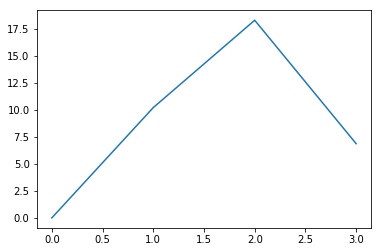

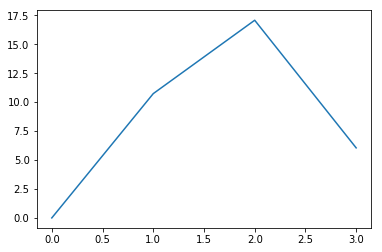

In [7]:
PG2 = Pattern_generator(series_length=4, period=8, amplitude=10, std=0.5, ftype = np.sin, signal_type = ts.signals.Sinusoidal)
y = PG2.get_bumpy_values()
y_min = np.min(y)
y = y - y_min
PG2.set_bumpy_values(y)
PG2.plot(False)
y = PG2.get_smooth_values()
y_min = np.min(y)
y = y - y_min
PG2.set_smooth_values(y)
PG2.plot()

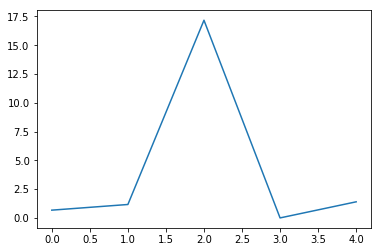

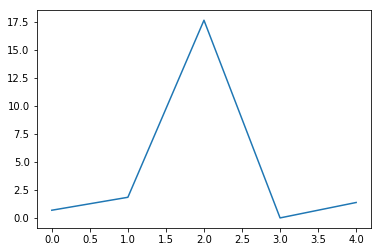

In [8]:
PG3 = Pattern_generator(series_length=5, period=10, amplitude=1, std=0.5, ftype = np.tan, signal_type = ts.signals.Sinusoidal)
y = PG3.get_bumpy_values()
y_min = np.min(y)
y = y - y_min
PG3.set_bumpy_values(y)
PG3.plot(False)
y = PG3.get_smooth_values()
y_min = np.min(y)
y = y - y_min
PG3.set_smooth_values(y)
PG3.plot()

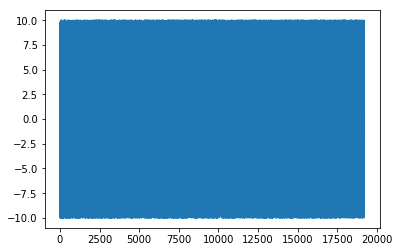

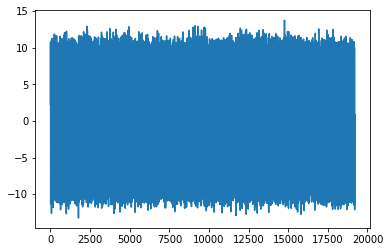

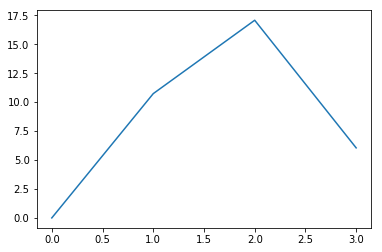

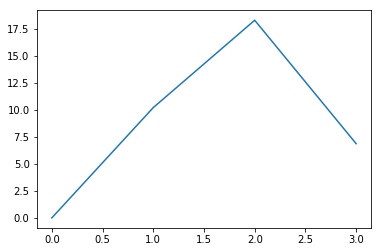

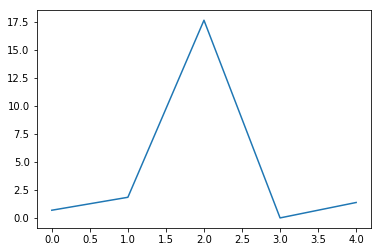

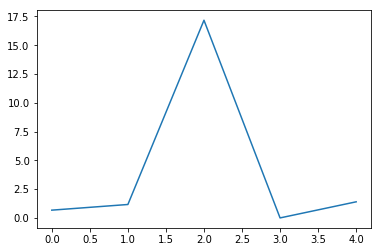

In [9]:
PG1.plot()
PG1.plot(False)
PG2.plot()
PG2.plot(False)
PG3.plot()
PG3.plot(False)

In [10]:
print(PG1.series_length)
print(PG2.series_length)
print(PG3.series_length)

# all periodic, __八__八__八___八__ (sin)

# all periodic, __八__八__八___八__ (pulse aka tan)

# all periodic, __--_____--____--___ (use Pattern_generator.bump only)

# all periodic, __/--\_____/--\______/--\___ (use Pattern_generator.bump and ramp)

# with change:





19200
4
5
